In [2]:
import pandas
from pandas import DataFrame
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [3]:
data = pandas.read_csv('cost_revenue_clean.csv')

In [4]:
data

,production_budget_usd,worldwide_gross_usd
0,1000000,26
1,10000,401
2,400000,423
3,750000,450
4,10000,527
5,1800000,673
6,1000000,703
7,6600000,828
8,1000000,884
9,7000,900


In [5]:
data.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


#### X = feature, independent variable
#### y = target, dependent variable


In [6]:
X = DataFrame(data, columns = ['production_budget_usd'])
y = DataFrame(data, columns = ['worldwide_gross_usd'])

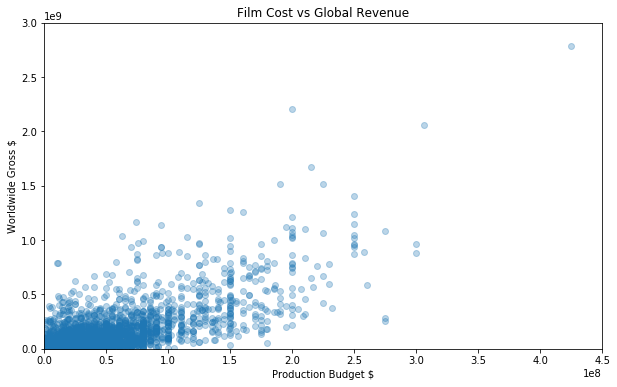

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3) #aplha is to make the dots tranparent
plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.xlim(0, 450000000)
plt.ylim(0, 3000000000)
plt.show()

In [8]:
regression = LinearRegression()
regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
#slope coefficient 
regression.coef_

array([[ 3.11150918]])

It means that for every dollar we spend to produce the movie it earns $3 revenue

In [10]:
#intercept
regression.intercept_

array([-7236192.72913963])

Here this number explains that if a movie is having a budget of 0 dollars it might loose 7 million dollars worldwide, which is quite unrealistic.

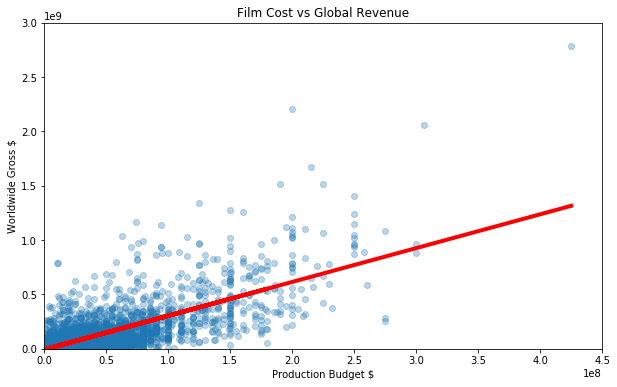

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3) #aplha is to make the dots tranparent
plt.plot(X, regression.predict(X), color='red', linewidth=4)

plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.xlim(0, 450000000)
plt.ylim(0, 3000000000)
plt.show()

Our model is just a dramatic simplification of real world. We can't totaly rely on our model specially at extreme ends as you can see at extreme ends is giving very far away results.

To see how good our model is and how much real world data it explains.

We need to look at a measure called **Goodness of Fit**   **R<sup>2</sup>** or **r<sup>2</sup>**


In [12]:
regression.score(X, y)

0.54964853569857275

This means that the amount of variation in film revenue which is explained by production budget is 55%, which is quite realistic number.